# Week 5

Phew. You've handed in the assignment. But there's no resting now. We're just hitting out grove, so let's get going!! Much to get through today.

## The plan for today

We continue learning about dataviz by focusing on data with two variables and their relationships. The lecture today has the following parts:
* In part 1, we talk about exploring data with two variables, make some logarithmic plots and think about what we have read in DAOST.
* Then, in part 2, we use sklearn and have fun with linear regression.

Ok. Now it's time to get started.

## Part 1: Exploratory data visualzation, two variables  

I told you how I love the Data Analysis with Open Source Tools book. If you managed to read Chapter 3, which is about visualizing data with two variables, before coming to class today it's great. If you haven't yet, this is the time to do it! 

*Reading*: DAOST Chapter 3 up to *Graphical Analysis and Presentation Graphics* on page 68 in the PDF. **You can find it on Teams in the** `files` **tab**.

And now a few exercises to reflect on the text:

*Exercise:* Questions from DAOST Chapter 3. 

> * Looking at Fig 3-1, Janert writes "the data itself shows clearly that the amount of random noise in the data is small". What do you think his argument is?
> * Can you think of a real-world example of a multivariate relationship like the one in Fig 3-3 (lower right panel)?
> * What are the two methods Janert metions for smoothing noisy data? Can you think of other ones?
> * What are residuals? Why is it a good idea to plot the residuals of your fit?
> * Explain in your own words the point of the smooth tube in figure 3-7.
> * What the h#ll is banking and what part of our visual system does it use to help us see patterns? What are potential problems with banking?


Banking is adjusting the view of the plot for better understanding. For example, changing the aspect ratio (4 by 3) is good, or zooming

> * Summarize the discussion of Graphical Analysis and Presentation Graphics on pp. 68-69 in your own words.

First: The basics. Initially, we are mostly concerned with displaying what is there.
• Select proper ranges.
• Subtract a constant offset.
• Decide whether to use symbols (for scattered data), lines (for continuous data), or
perhaps both (connecting individual symbols can help emphasize trends in sparse data
sets).

Second: The appearance. Next, we work with aspects of the plot that influence its overall
appearance.
• Log plots.
• Add a smoothed curve.
• Consider banking.

Third: Build a model. At this point, we start building a mathematical model and
compare it against the raw data. The comparison often involves finding the differences
between the model and the data (typically subtracting the model or forming a ratio).
• Subtract a trend.
• Form the ratio to a base value or baseline.
• Rescale a set of curves to collapse them onto each other.

Fourth (for presentation graphics only): Add embellishments. Embellishments and
decorations (labels, arrows, special symbols, explanations, and so on) can make a graph
much more informative and self-explanatory. However, they are intended for an audience
beyond the actual creator of the graph. You will rarely need them during the analysis
phase, when you are trying to find out something new about the data set, but they are an
essential part when presenting your results. This step should only occur if you want to
communicate your results to a wider and more general audience.

Ok. Let's briefly talk about logarithms and logarithimic plots (if you take my networks class in the fall semester you'll se lots of loglog plots since they're important for understanding a key property of networks).

*Exercise 2.2*: Logarithms and logarithmic plots. 

> * First, a couple of questions:
>    * What kind of relationships will a semi-log plot help you discover? 


When a dataset isn't scaled and thus hard to compare, semi-log can help reveal any releation (i.e. parallism, continous patterns)

>    * What kind of functions will loglog plots help you see?
> * Second, create a version of [this plot](https://github.com/suneman/socialdata2022/blob/main/files/CrimeOccurrencesByCategory.png) from Week 1, where you display the $y$-axis on log-scale. Comment on what the plot looks like. Do any new insights arise?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Load complete dataset
df = pd.read_csv('../data/Police_Department_Incident_Reports_Complete.csv')

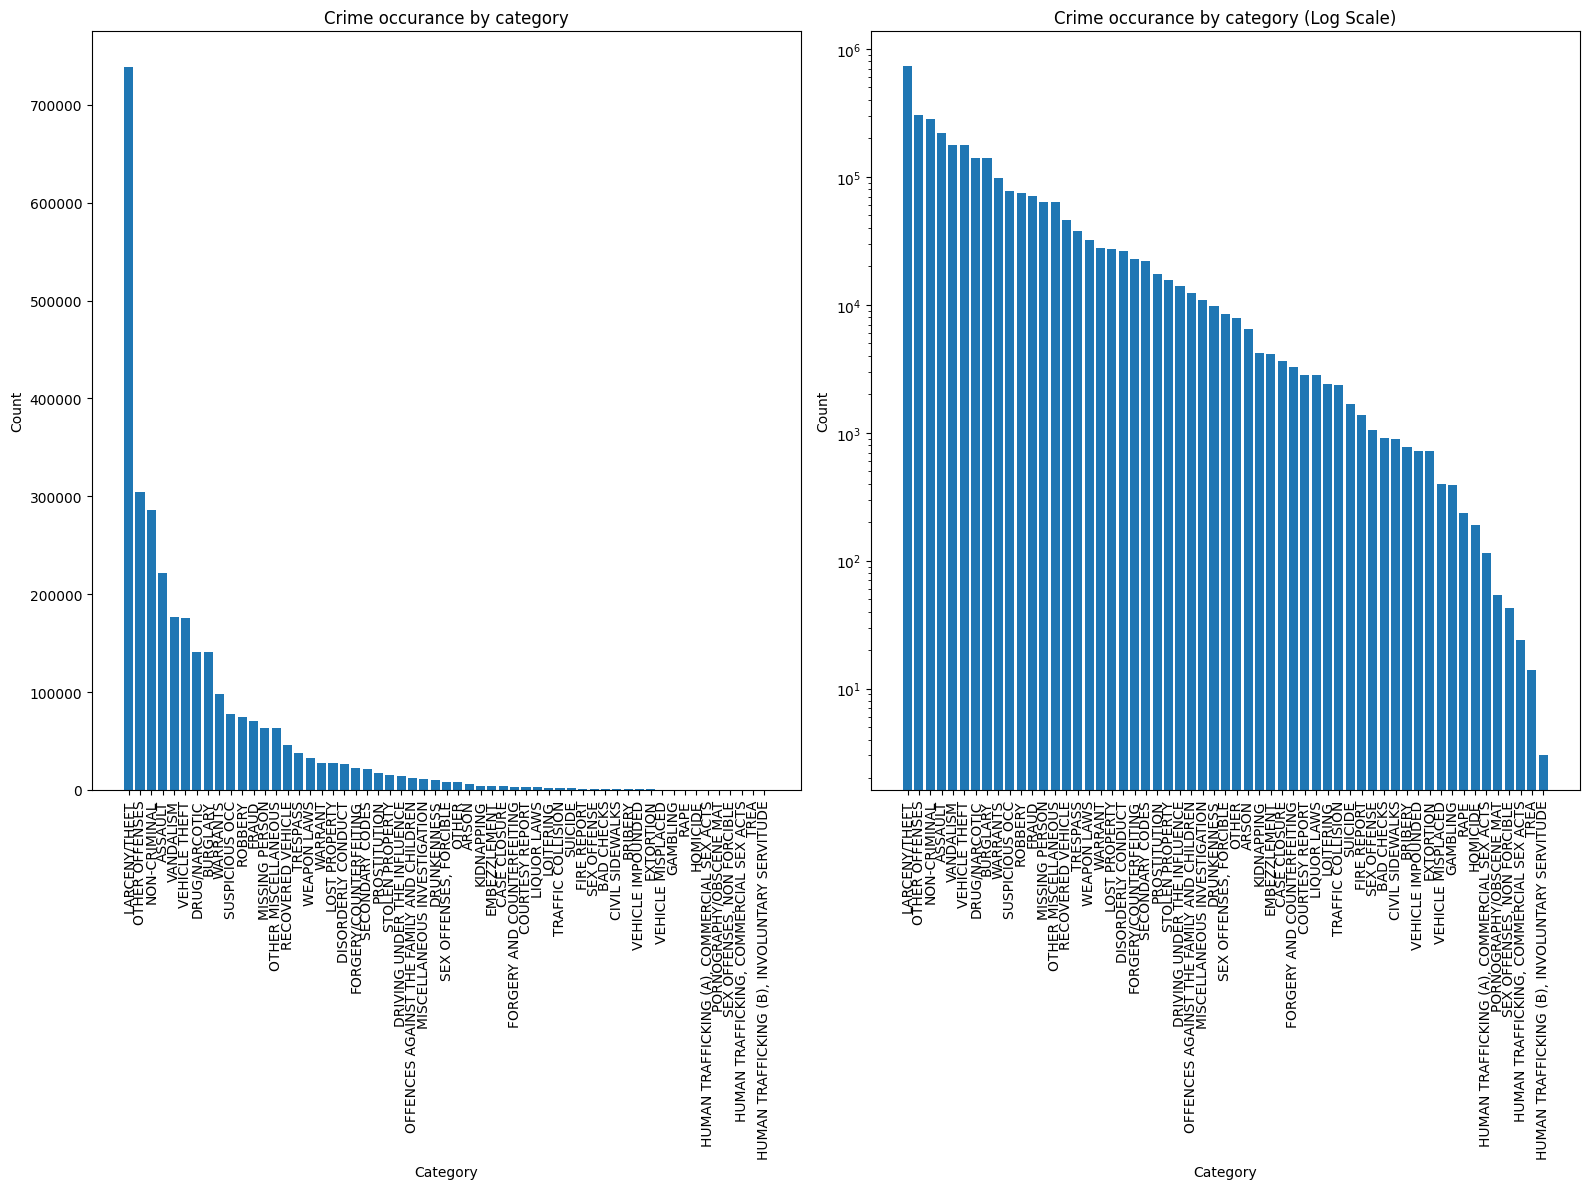

In [3]:
#Crime occurance by category
crime_category = df['Category'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(16, 12))

# Plot bar graph
axs[0].bar(crime_category.index, crime_category.values)
axs[0].set_title('Crime occurance by category')
axs[0].set_xlabel('Category')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=90)

# Plot semi-logarithmic graph
axs[1].bar(crime_category.index, crime_category.values)
axs[1].set_yscale('log')
axs[1].set_title('Crime occurance by category (Log Scale)')
axs[1].set_xlabel('Category')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


> * Third, let's also try a loglog plot. Inspired by [this article](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0183110) I would expect that especially theft could be characterized by a power law distribution also in San Francisco. Let's see if I'm right. <font color=gray>It's OK use LLMs as much as you can for this one</font>
>   - *Step 1:* Divide San Francisco into a grid **roughly** $100m \times 100m$. You can, for example use numpy to do this, I would call `np.histogram2d`, and searching the internet, it seems that there are also [ways to do this in pandas](https://stackoverflow.com/questions/39254704/pandas-group-bins-of-data-per-longitude-latitude). The earth isn't flat,so `lat,` `lon` aren't really squares, but it is OK to ignore. 
>       * **Hint 1**. I really mean approximately 100 meters. It can also be 200 meters. Or 80 meters. Or 300.
>       * **Hint 2**. Ignore outliers. We only want points that are on the SF peninsula
>       * **Hint 3**. If you want help, plus see how this is done with all the bells and whistles, we've made a little example of how you can do the binning. Get it [here](https://github.com/suneman/socialdata2022/blob/main/lectures/Week5_binning.ipynb).
>       * **Hint 4**. Ask your LLM.

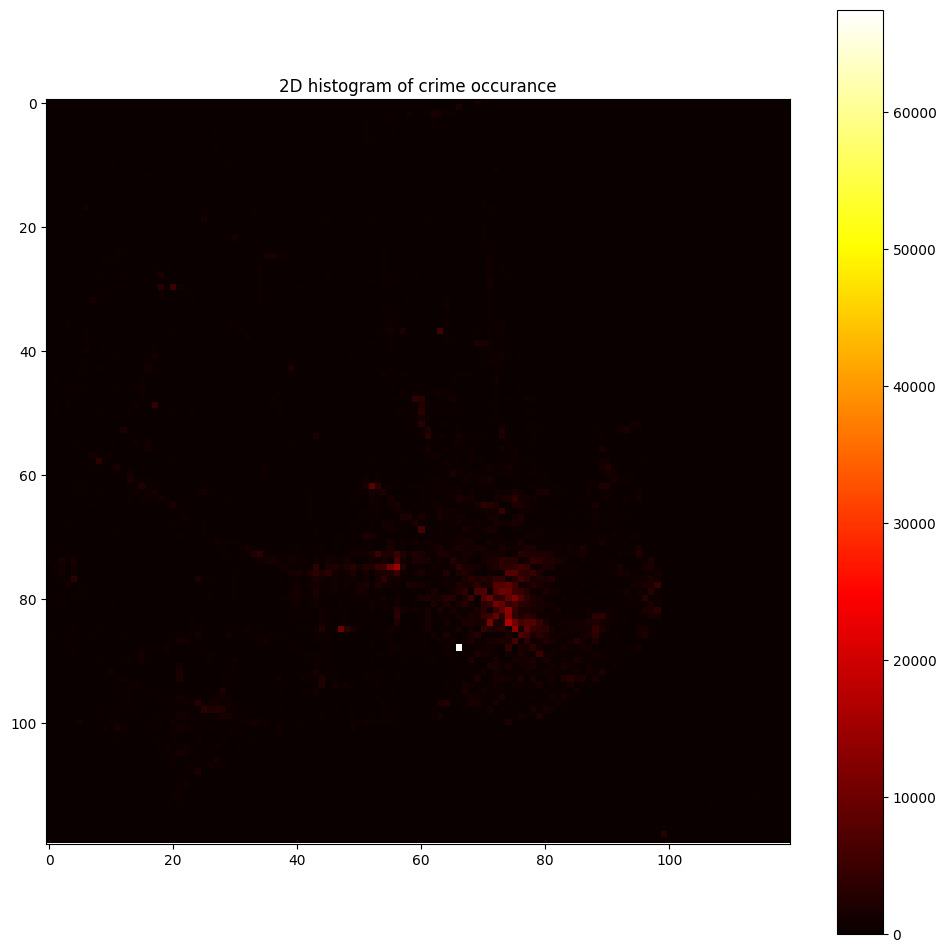

In [18]:
#1) Divide San Francisco into grid using np.histogram2d

#1 lattitude = aprox 110000 meters
#if we want a 100x100 grid...



#Highest Latitude: 90.0
#Lowest Latitude: 37.70784759521485
#Highest Longitude: -120.5
#Lowest Longitude: -122.51364206429

#nevermind
#121 quare km into 100m x 100m grid


# Define grid size
grid_size = 120 #this is not meters...
#Remove outliers data = data[(Y < 50) & (X<-122)]
grid = df[(df['Latitude (Y)'] < 50) & (df['Longitude (X)'] < -122)]
# Create 2D histogram
hist, x_edges, y_edges = np.histogram2d(grid['Longitude (X)'], grid['Latitude (Y)'], bins=grid_size)
# Plot 2D histogram
plt.figure(figsize=(12, 12))
plt.imshow(hist, cmap='hot', interpolation='nearest')
plt.title('2D histogram of crime occurance')
plt.colorbar()
plt.show()




>   - *Step 2:* Count the number of thefts occurring within each grid-square (use all data for all time).
>   - *Step 3:* Tally the counts. Count the number of squares with $k=0$ thefts. We call this $N(0)$. Next, count the number of grids with one crime to get $N(k=1)$. Keep going like this all the way up to $k=C_{max}$, where $C_{max}$ is the highest count of crimes you find in any grid space. 
>     * *Extra tip*: If you want all the details on binning for loglog axes, you can check out [Lecture 2, Part 3](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/lectures/Week2.ipynb) in my social graphs course.


In [ ]:
#2) Count number of thefts in each grid
# Filter theft data
theft = grid[grid['Category'] == 'LARCENY/THEFT']

# Count
theft_count, _, _ = np.histogram2d(theft['Longitude (X)'], theft['Latitude (Y)'], bins=grid_size)

In [29]:
#3) Tally the counts. Count the number of squares with k = 0 thefts, k = 1 theft, k = 2 thefts, etc.
# Flatten 2D array
theft_count = theft_count.flatten()
# Count number of squares with k thefts
theft_tally = np.bincount(theft_count.astype(int))

>   - *Step 4:* Plot the distribution of $k+1$ vs $N(k)$ on linear axes.


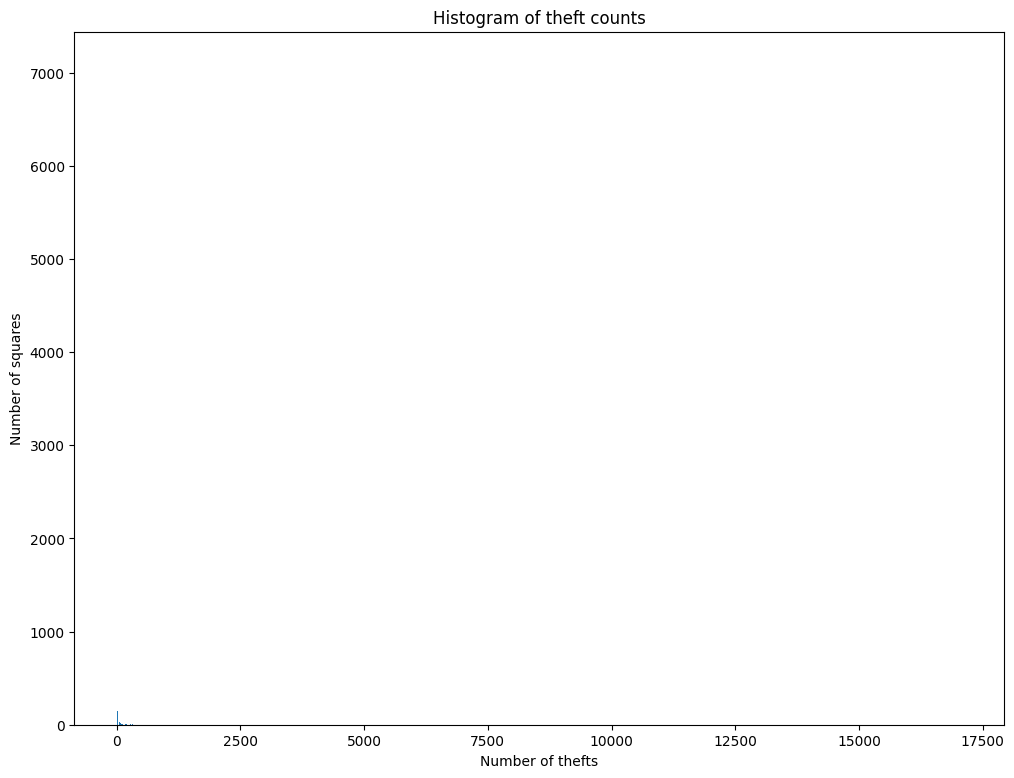

In [30]:
#4) Plot the histogram of theft counts on linear scale
plt.figure(figsize=(12, 9))
plt.bar(range(len(theft_tally)), theft_tally)
plt.title('Histogram of theft counts')
plt.xlabel('Number of thefts')
plt.ylabel('Number of squares')
plt.show()

>   - *Step 5:* Plot the distribution of $k+1$ vs $N(k)$ on loglog axes.


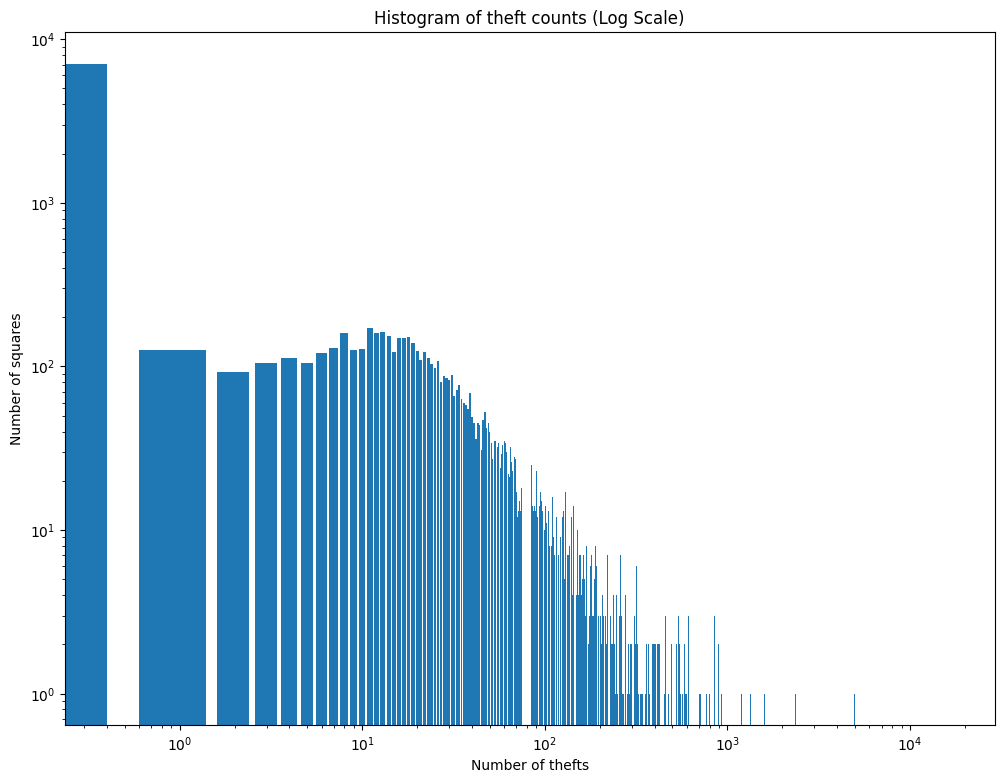

In [32]:
#5) print on log scale
plt.figure(figsize=(12, 9))
plt.bar(range(len(theft_tally)), theft_tally)
plt.yscale('log')
plt.xscale('log')
plt.title('Histogram of theft counts (Log Scale)')
plt.xlabel('Number of thefts')
plt.ylabel('Number of squares')
plt.show()

>   - *Step 6:* Answer the question. Was Sune correct in assuming that there is a power-law distribution of theft?

That seems to be the case. With some clean-up (like removing squares with k = 1 (that are probably water)) it might be even clearer.

## Part 2: Linear Regression

So, now it's time for fun with standard linear regression! We'll get into that by asking the following question.

> *Which pair of the 10 focus crimes have the the most similar temporal pattern across the week? (And which pair is most dissimilar).*

One way to answer this question is to plot the activity for all pairs of crimetypes as scatter plot per pair. One crime type on each axis, and where each point in the scatter corresponds to an hour of the week, and the number of crimes of crime-type 1 is on the $x$-axis and the number of crimes of crime-type 2 is on the $y$-axis. (So there will be 168 points in each scatterplot.) If we look at 10 focus crimes that results in 45 pairwise comparisons. 

*Exercise*: Create the 91 scatterplots.
> * Display the plots in a $5$ by $9$ subplot matrix. You can use matplotlib's `subplot` to organize those plots. With $5$ across and $9$ down, you should be able to squeeze them all onto a single [a4](https://en.wikipedia.org/wiki/ISO_216#A_series) page.
>     * Make sure to label each one with the two crime-types you're comparing so we can easily inspect visually.
>     * Make sure that that you squeeze the subplots closely together so each plot can be as big as possible. 
> * Just inspecting this matrix, which crime-types look correlated and which one look like they're very different?

<div class="alert alert-block alert-info">
It's OK to use your LLM for all aspects this exercise.
</div>

---

Next it's time for the linear regression. Janert writes about this on page 63-66. 

There is a closed-form solution for linear regression. If you want to find the best straight line $y = ax + b$ fit to a set of $N$ points $\{(x_1,y_1), (x_2,y_2), \ldots (x_N,y_N)\}$, the value of $b$ is

$$
\tag{1}
b = \langle y \rangle - a \langle x \rangle,
$$

where $\langle x \rangle = (1/N)\sum_i x_i$ is the mean value of the $x_i$ and $\langle y \rangle = (1/N)\sum_i x_i$ is the mean value of the $y_i$. 

And the value for the slope $a$ is 

$$
\tag{2}
a = \frac{\sum_{i=1}^N \left( x_iy_i \right) - N \langle x\rangle\langle y\rangle }{\sum_{i=1}^N\left( x_i^2 \right) - N\langle x\rangle^2}.
$$


A couple of years ago, I actually derived the whole thing. I've taken it out of the notebook. But if you'd like to take a look (it's a fun and instructive little exercise), you can find it **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/LinearRegressionDerived.ipynb)**. 

We are going to focus on the fit for now, but keep in mind what we have learnt so far about the purpose of linear regression! 

*Exercise:* Linear regression. 

> * Using Equation 1 and 2 above, calculate the slopes for $a$ and $b$ in each case and add them to the plot. (You are free to compare the results with ones obtained using a package like `sklearn` to check that everything is working as expected.) <font color=gray>See if you can do this by yourself without LLM help</font>.
> * You can add even more information to this plot by coloring each point according to its hour of the week. So create a gradient going from one color to another, and color each point according to the gradient. (So let's say your two colors are red and blue, then the Sunday, midnight to 1am bin will be red and the following Sunday, 11pm - midnight bin will be blue). <font color=gray>It's OK use full LLM help here</font>
> * Do any patterns stand out as you inspect the plot? Mention one or two that catch your eye -- it may be both because the sequences are similar or because they are different, or something entirely different altogether.

<div class="alert alert-block alert-info">
See LLM comments in gray.
</div>

---

But the question we started with was "Which pair of focus crimes have the the most similar temporal pattern across the week?". We haven't really answered that yet. So let's calculate one last thing: $R^2$. 

Basically $R^2$ is a measures of how good a linear fit is. You can [read about $R^2$ on wikipedia](https://en.wikipedia.org/wiki/Coefficient_of_determination). 

*Exercise:* Goodness of fit as a measure of correlation. 
> * Write a little function to calculate $R^2$ alongside each linear fit. (Again you can compare it with a package to check that it works, e.g. the one provided by the function `score()` in `sklearn`.) <font color=gray>Try this without the help of an LLM.</font>
> * Explain the connection between $R^2$ and the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient). <font color=gray>Try this without the help of an LLM, at least first. Then you may ask it to see if you got it right.</font>
> * **According to the fits and associated $R^2$**, which pair of crimes have the **most similar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not?
> * According to your fits and associated measure of $R^2$, which pair of crimes have the **most dissimilar** temporal pattern. Discuss your finding: Does it make sense? Why?/Why not? Does it corresponds with your observations from the previous exercise?
> * Create a final mega-plot with all of the 91 megaplots, fits, and $R^2$ value written as [text](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html) on each plot. In this figure, you should also find a way to visually highlight the two most similar/dissimilar crimes. <font color=gray>Totally fine to use an LLM to help you organize the plot and make it look amazing.</font>


<div class="alert alert-block alert-info">
See LLM comments in gray.
</div>